## Exploración de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Leer los datos

In [2]:
df_train = pd.read_csv('./data/org/data_selec_entre.csv')
df_test = pd.read_csv('./data/org/data_selec_test.csv')

### 2. Ver nulos y tipos de datos

In [3]:
df_train = df_train.replace(['NULO', -999,'-999', 'INF. NO DISPONIBLE'], np.nan)
df_test = df_test.replace(['NULO', -999,'-999', 'INF. NO DISPONIBLE'], np.nan)

df_train['DF_TYPE'] = 'TRAIN'
df_test['DF_TYPE'] = 'TEST'

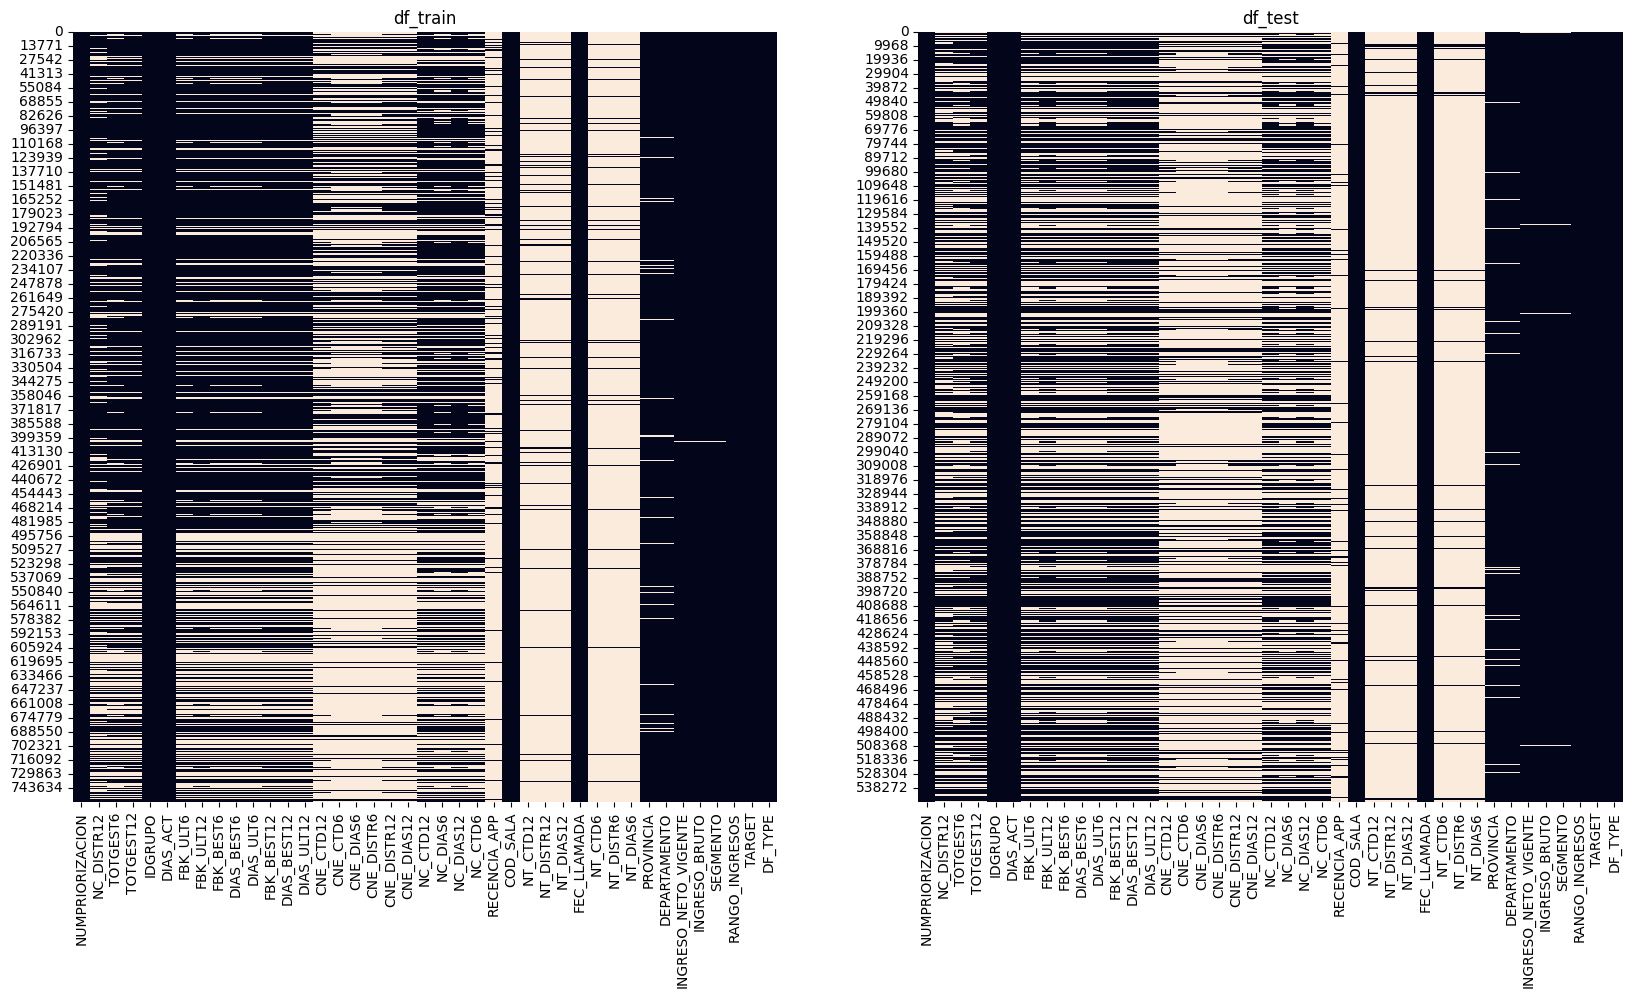

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Heatmap para df_train
sns.heatmap(df_train.isnull(), cbar=False, ax=axs[0])
axs[0].set_title('df_train')

# Heatmap para df_test
sns.heatmap(df_test.isnull(), cbar=False, ax=axs[1])
axs[1].set_title('df_test')

plt.show()

In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            507452 non-null  float64
 2   TOTGEST6              565441 non-null  float64
 3   TOTGEST12             587885 non-null  float64
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              565441 non-null  object 
 7   FBK_ULT12             587885 non-null  object 
 8   FBK_BEST6             565441 non-null  object 
 9   DIAS_BEST6            565441 non-null  float64
 10  DIAS_ULT6             565441 non-null  float64
 11  FBK_BEST12            587885 non-null  object 
 12  DIAS_BEST12           587885 non-null  float64
 13  DIAS_ULT12            587885 non-null  float64
 14  CNE_CTD12             302045 non-null  float64
 15  

In [6]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            297220 non-null  float64
 2   TOTGEST6              307847 non-null  float64
 3   TOTGEST12             336281 non-null  float64
 4   IDGRUPO               548214 non-null  int64  
 5   DIAS_ACT              548214 non-null  int64  
 6   FBK_ULT6              307847 non-null  object 
 7   FBK_ULT12             336281 non-null  object 
 8   FBK_BEST6             307847 non-null  object 
 9   DIAS_BEST6            307847 non-null  float64
 10  DIAS_ULT6             307847 non-null  float64
 11  FBK_BEST12            336281 non-null  object 
 12  DIAS_BEST12           336281 non-null  float64
 13  DIAS_ULT12            336281 non-null  float64
 14  CNE_CTD12             146645 non-null  float64
 15  

### 3. Explorar datos en conjunto

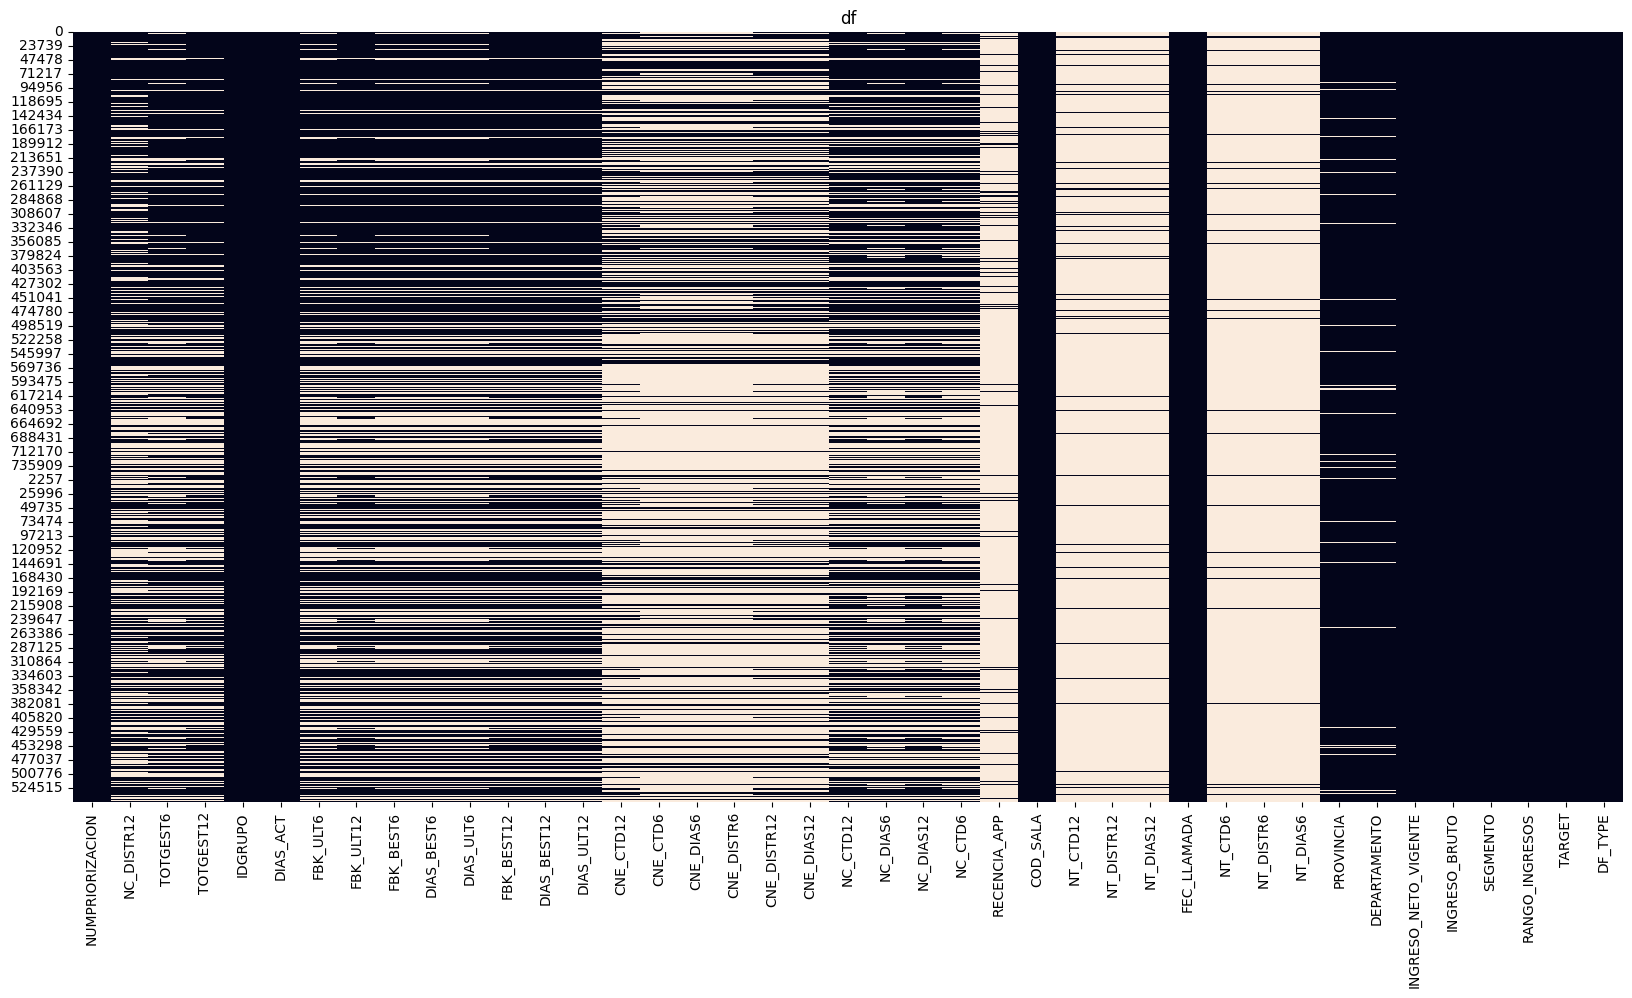

In [7]:
df = pd.concat([df_train, df_test], axis=0)

plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False)
plt.title('df')
plt.show()

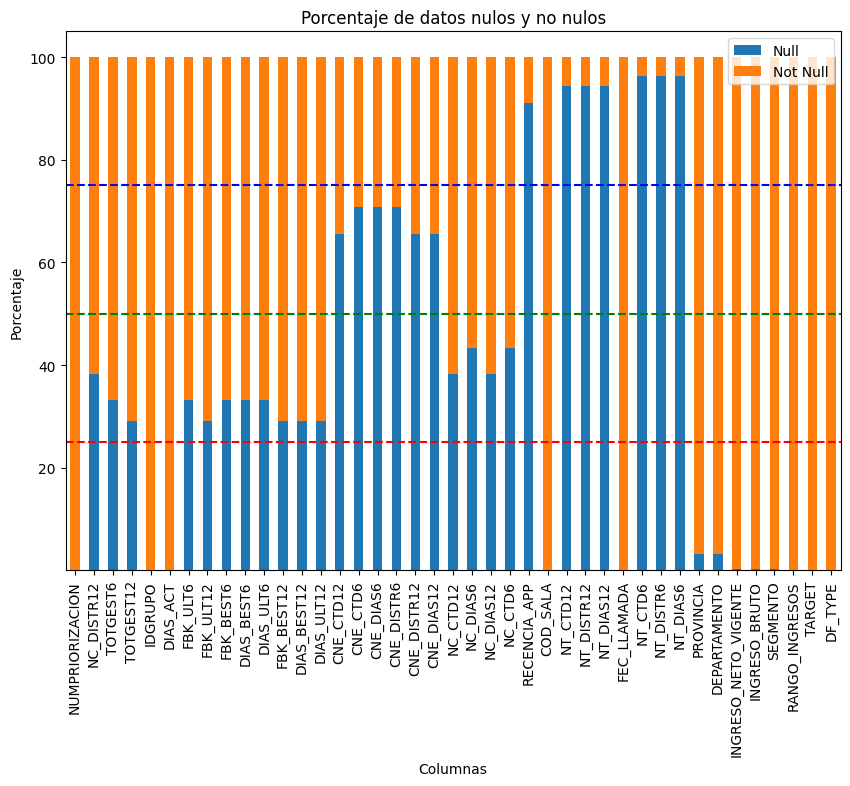

In [8]:
# Calcular el porcentaje de valores nulos y no nulos
null_values = df.isnull().mean() * 100
not_null_values = 100 - null_values

# Crear un DataFrame con estos porcentajes
df_percentages = pd.DataFrame({'Null': null_values, 'Not Null': not_null_values})

# Crear un gráfico de barras apilado al 100%
df_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Porcentaje de datos nulos y no nulos')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')

# Agregar líneas horizontales
plt.axhline(y=25, color='r', linestyle='--')
plt.axhline(y=50, color='g', linestyle='--')
plt.axhline(y=75, color='b', linestyle='--')

plt.show()

In [12]:
df.to_parquet('./data/1_data_exploracion_datos.parquet', index=False)
print('Datos guardados en ./data/1_data_exploracion_datos.parquet')

Datos guardados en ./data/1_data_exploracion_datos.parquet


In [11]:
# df_drop = df.dropna(thresh=df.shape[0]*0.5, axis=1)

# # Calcular el porcentaje de valores nulos y no nulos
# null_values = df_drop.isnull().mean() * 100
# not_null_values = 100 - null_values

# # Crear un DataFrame con estos porcentajes
# df_percentages = pd.DataFrame({'Null': null_values, 'Not Null': not_null_values})

# # Crear un gráfico de barras apilado al 100%
# df_percentages.plot(kind='bar', stacked=True, figsize=(10, 7))

# plt.title('Porcentaje de datos nulos y no nulos')
# plt.xlabel('Columnas')
# plt.ylabel('Porcentaje')

# # Agregar líneas horizontales
# plt.axhline(y=30, color='r', linestyle='--')
# plt.axhline(y=40, color='g', linestyle='--')
# plt.axhline(y=50, color='b', linestyle='--')

# plt.show()